<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_Nr13_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#stack
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(font_scale=1.3)

In [5]:
# ścieżka do pliku w sample_data
df = pd.read_csv("sample_data/mtcars_data.csv")

print(df.head())
print(df.info())


    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(

Normalizacja i podział na grupy klastrów

In [7]:

#Wybór cech do klastrowania
features = ["mpg", "hp", "wt", "disp"]   # efektywność, moc, masa, pojemność
#
#Normalizacja wybranych cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
#
#DataFrame z danymi do klastrowania
data = pd.DataFrame(X_scaled, columns=features, index=df.index)
#
print(data.head())

# 5. Scatter nr1
fig1 = px.scatter(
    data,
    x="hp",
    y="wt",
    title="mtcars (hp - wt)- normalized",
    template="plotly_dark",
    width=900,
    height=500
)
fig1.show()

fig2 = px.scatter(
    data,
    x="mpg",
    y="disp",
    title="mtcars (mpg - disp) normalized",
    template="plotly_dark",
    width=900,
    height=500
)
fig2.show()


        mpg        hp        wt      disp
0  0.153299 -0.543655 -0.620167 -0.579750
1  0.153299 -0.543655 -0.355382 -0.579750
2  0.456737 -0.795570 -0.931678 -1.006026
3  0.220730 -0.543655 -0.002336  0.223615
4 -0.234427  0.419550  0.231297  1.059772


In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) #3 klastrów model
kmeans.fit(data)

KMeans(n_clusters=3)

In [10]:
wcss = [] #
for i in range(2, 10): #iteracja na ilości klastrów do reguły łokcia
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

print(wcss)

[47.55882138199432, 36.1345117731347, 18.96160752205961, 12.603685252311474, 10.183546260201375, 9.05073562275553, 7.788652506130206, 7.250518800473706]


In [12]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,47.558821
1,2,36.134512
2,3,18.961608
3,4,12.603685
4,5,10.183546


In [13]:
px.line(wcss, x='clusters', y='wcss', width=950, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)',
        template='plotly_dark')

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'hp', 'wt', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry',
           template='plotly_dark')

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'mpg', 'disp', 'y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry',
           template='plotly_dark')

In [27]:
#stack
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Wczytanie danych
df = pd.read_csv("sample_data/mtcars_data.csv")

# 2. Cechy do klastrowania
features = ["hp", "wt", "mpg", "disp"]

# 3. Normalizacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 4. K-means na znormalizowanych danych
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# etykiety klastrów do df
df["y_kmeans"] = kmeans.labels_

# 5. Centroidy – cofnięte do oryginalnej skali (żeby pasowały do wykresów df)
centers_scaled = kmeans.cluster_centers_
centers = pd.DataFrame(
    scaler.inverse_transform(centers_scaled),
    columns=features
)
print(centers)

# ===== WYKRES 1: hp vs wt + centroidy =====
fig1 = px.scatter(
    df,
    x="hp",
    y="wt",
    color="y_kmeans",
    width=950,
    height=500,
    title="Algorytm K-średnich - 3 klastry (hp vs wt)",
    template="plotly_dark"
)

fig1.add_trace(
    go.Scatter(
        x=centers["hp"],
        y=centers["wt"],
        mode="markers",
        marker={
            "size": 14,
            "symbol": "x",
            "line": {"width": 2, "color": "white"}
        },
        showlegend=False
    )
)

fig1.show()

# ===== WYKRES 2: mpg vs disp + centroidy =====
fig2 = px.scatter(
    df,
    x="mpg",
    y="disp",
    color="y_kmeans",
    width=950,
    height=500,
    title="Algorytm K-średnich - 3 klastry (mpg vs disp)",
    template="plotly_dark"
)

fig2.add_trace(
    go.Scatter(
        x=centers["mpg"],
        y=centers["disp"],
        mode="markers",
        marker={
            "size": 14,
            "symbol": "x",
            "line": {"width": 2, "color": "white"}
        },
        showlegend=False
    )
)

fig2.show()


           hp        wt        mpg        disp
0  209.214286  3.999214  15.100000  353.100000
1   75.500000  1.873000  30.066667   86.650000
2  109.333333  2.977083  20.925000  159.983333


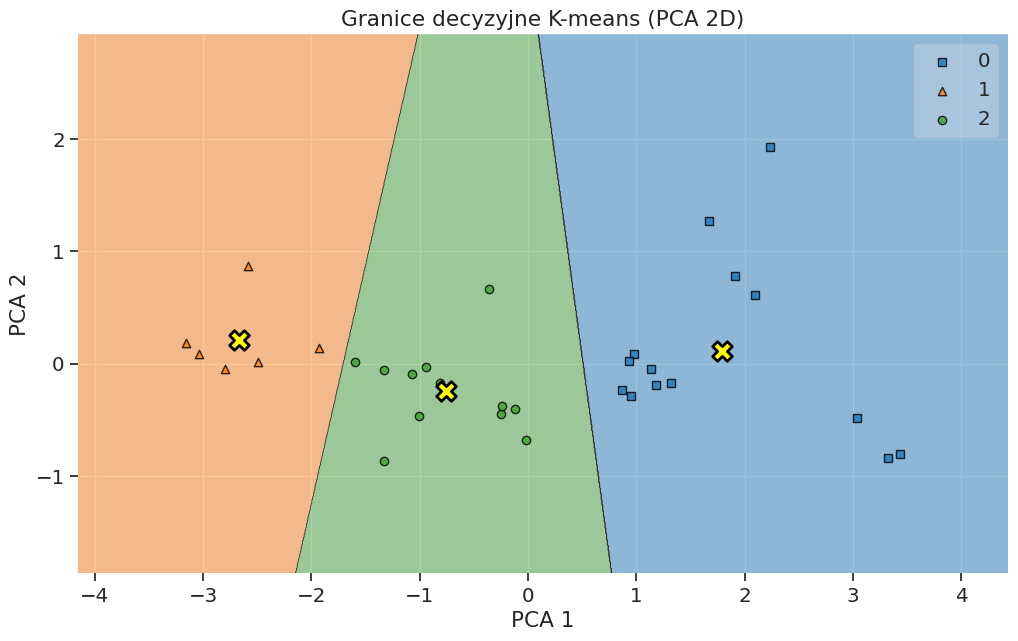

In [28]:
#stack
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

# 1. Wczytanie mtcars
df = pd.read_csv("sample_data/mtcars_data.csv")

# 2. Cechy do klastrowania
features = ["hp", "wt", "mpg", "disp"]

# 3. Normalizacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 4. PCA → 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. K-means na PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

y_kmeans = kmeans.labels_
df["cluster"] = y_kmeans

# 6. Centroidy w przestrzeni PCA
centers_pca = kmeans.cluster_centers_

# 7. Granice decyzyjne
plt.figure(figsize=(12, 7))
plt.title("Granice decyzyjne K-means (PCA 2D)")

plot_decision_regions(X_pca, y_kmeans, clf=kmeans, legend=1)

# centroidy
plt.scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    s=200,
    marker="X",
    c="yellow",
    edgecolor="black",
    linewidth=2
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
